In [3]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### loading the dataset

In [5]:
train_set=pd.read_csv('/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/train_datasetset1.csv')
test_set=pd.read_csv('/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/unseen_dataset1.csv')
train_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
1,F,75,1,2,1,2,2,2,2,1,2,2,1,1,1,YES
2,F,56,1,1,2,2,2,2,2,2,2,1,2,2,2,YES
3,M,66,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
4,F,78,2,2,2,2,1,2,1,2,1,2,2,2,1,YES


In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 247 non-null    object
 1   AGE                    247 non-null    int64 
 2   SMOKING                247 non-null    int64 
 3   YELLOW_FINGERS         247 non-null    int64 
 4   ANXIETY                247 non-null    int64 
 5   PEER_PRESSURE          247 non-null    int64 
 6   CHRONIC DISEASE        247 non-null    int64 
 7   FATIGUE                247 non-null    int64 
 8   ALLERGY                247 non-null    int64 
 9   WHEEZING               247 non-null    int64 
 10  ALCOHOL CONSUMING      247 non-null    int64 
 11  COUGHING               247 non-null    int64 
 12  SHORTNESS OF BREATH    247 non-null    int64 
 13  SWALLOWING DIFFICULTY  247 non-null    int64 
 14  CHEST PAIN             247 non-null    int64 
 15  LUNG_CANCER            

In [6]:
X_train=train_set.drop(columns =['LUNG_CANCER'], axis = 1)
y_train=train_set['LUNG_CANCER']
X_train.shape, y_train.shape

((247, 15), (247,))

In [7]:
y_test=test_set['LUNG_CANCER']
X_test=test_set.drop(columns =['LUNG_CANCER'], axis = 1)
X_test.shape, y_test.shape

((62, 15), (62,))

###  LabelEncoder  

In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder_X = LabelEncoder()
X_train['GENDER']= encoder_X.fit_transform(X_train['GENDER'])
X_test['GENDER'] = encoder_X.transform(X_test['GENDER'])
encoder_y = LabelEncoder()
y_train= encoder_y.fit_transform(y_train)
y_test = encoder_y.transform(y_test)

### Finding best model and hyper parameters

In [9]:

model_params = {
    
    'RF': {
        'model': RandomForestClassifier(),
        'params' :   { 'max_depth': [100,200],
        'criterion': ['gini', 'entropy'],
        }
    },
    'LR' : {
        'model': LogisticRegression(solver='sag'),
        'params': { "C":np.logspace(-3,3,7), "penalty":['none', 'l1', 'l2', 'elasticnet'],
              "solver" : ['newton-cg','lbfgs','liblinear','sag','saga'],
    'class_weight':['balanced', None]
             }}
    ,
    'DT': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth':[100,200],
                
             'max_features': [1, 2, 3, 4,5,6,7,8,9,10],
             'criterion': ['gini', 'entropy'],
             
        }
    }  
    ,
    'NB': {
        'model':  MultinomialNB(),
        'params': {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  }
    } ,
     'KNN': {
     'model': KNeighborsClassifier(),
    'params':  {'n_neighbors':[50,60,70,100],'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
    }
,
   'SVM': {
     'model': SVC(),
    'params':  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['linear','rbf','poly',]}}

}

In [10]:
scores = []
model={}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, scoring = 'accuracy',return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_grid=clf.fit(X_train, y_train)
    model[model_name]=best_grid.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_params'])
df

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklear

,model,best_params
0,RF,"{'criterion': 'entropy', 'max_depth': 200}"
1,LR,"{'C': 10.0, 'class_weight': None, 'penalty': '..."
2,DT,"{'criterion': 'entropy', 'max_depth': 200, 'ma..."
3,NB,{'alpha': 1}
4,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig..."
5,SVM,"{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}"


### Print best values of parameters for each model

In [24]:
df

,model,best_params
0,RF,"{'criterion': 'entropy', 'max_depth': 200}"
1,LR,"{'C': 10.0, 'class_weight': None, 'penalty': '..."
2,DT,"{'criterion': 'entropy', 'max_depth': 200, 'ma..."
3,NB,{'alpha': 1}
4,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig..."
5,SVM,"{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}"


### Save each model

In [13]:
gridRF=model['RF']
gridLR=model['LR']
gridDT=model['DT']
gridNB=model['NB']
gridKNN=model['KNN']
gridSVM=model['SVM']

In [23]:
import pickle

pickle.dump(gridRF, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/RF.pkl", "wb"))
pickle.dump(gridLR, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/LR.pkl", "wb"))
pickle.dump(gridDT, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/DT.pkl", "wb"))
pickle.dump(gridNB, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/NB.pkl", "wb"))
pickle.dump(gridKNN, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/KNN.pkl", "wb"))
pickle.dump(gridSVM, open("/content/drive/MyDrive/Lung Cancer Project/Lung Cancer CSV/models/SVM.pkl", "wb"))


### Geting cross-validation result for cross-validation and testing result for unseen set

In [15]:
scoring=['accuracy','roc_auc','recall','f1','precision']
best_model={'RF':gridRF,'LR':gridLR,'DT':gridDT,
            'NB':gridNB,'KNN':gridKNN, 'SVM':gridSVM}

In [16]:
finaltrain = pd.DataFrame([])
ReultofTest=pd.DataFrame([])
for model_name, i in best_model.items():   
    Model=i
    AccuracyTrain=[]
    PrecisionTrain=[]
    RecallTrain=[]
    F1Train=[]

    AccuracyTest=[]
    PrecisionTest=[]
    RecallTest=[]
    F1Test=[]

    for i in range(0,1):
        if i==0:
            r=70
        elif i== 1:
            r=80
   

        SFold = StratifiedKFold(n_splits=10,  shuffle=True,random_state=r)
        Train_Score = cross_validate(Model, X_train, y_train, scoring=scoring,  cv=SFold)
        AccuracyTrain.append(round(100*np.mean(Train_Score['test_accuracy']), 2))
        PrecisionTrain.append(round(100*np.mean(Train_Score['test_precision']), 2))
        RecallTrain.append(round(100*np.mean(Train_Score['test_recall']), 2))
        F1Train.append(round(100*np.mean(Train_Score['test_f1']), 2))
        
        y_pred = cross_val_predict(Model, X_test, y_test, cv=SFold )
        Accurcy_Test= accuracy_score(y_test,y_pred)
        Precision_Test=precision_score(y_test, y_pred, average='weighted')
        Recall_Test=recall_score(y_test, y_pred, average='weighted')
        F1_Test=f1_score(y_test, y_pred, average='weighted') 
        RocTest=roc_auc_score(y_test, y_pred, average='weighted')
        AccuracyTest.append(round(100*Accurcy_Test, 2))
        PrecisionTest.append(round(100*Precision_Test, 2))
        RecallTest.append(round(100*Recall_Test, 2))
        F1Test.append(round(100*F1_Test, 2)) 
 
        finaltrain = finaltrain.append({ 'model':model_name,
                                        'AccuracyTrain' : round(np.mean(AccuracyTrain),2),
                                        'PrecisionTrain':round(np.mean(PrecisionTrain),2),
                                        'RecallTrain':round(np.mean(RecallTrain),2),  
                                        'F1Train':round(np.mean(F1Train),2),
                                        
                                       } , ignore_index=True)
        finaltrain.reindex(['model','AccuracyTrain','PrecisionTrain','RecallTrain','F1Train'], axis=1)
        
       
        ReultofTest=ReultofTest.append({'model':model_name,
                                        'AccuracyTest' : round(np.mean(AccuracyTest),2),
                                        'PrecisionTest':round(np.mean(PrecisionTest),2),
                                        'RecallTest' : round(np.mean(RecallTest),2),'F1Test':round(np.mean(F1Test),2),
                                       
                                       }, ignore_index=True)
        ReultofTest.reindex(['model','AccuracyTest','PrecisionTest','RecallTest','F1Test'],axis=1)
       

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

### Print avarage of training set and testing set 

In [17]:
with pd.option_context('expand_frame_repr', False):
    print (finaltrain)


  model  AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0    RF          90.27           92.22        97.19    94.57
1    LR          91.08           94.25        95.78    94.89
2    DT          87.02           90.50        95.39    92.77
3    NB          87.45           87.45       100.00    93.30
4   KNN          88.25           88.17       100.00    93.71
5   SVM          91.47           94.55        95.78    95.11


In [18]:
with pd.option_context('expand_frame_repr', False):
    print (ReultofTest)


  model  AccuracyTest  PrecisionTest  RecallTest  F1Test
0    RF         93.55          93.99       93.55   92.59
1    LR         91.94          92.41       91.94   92.13
2    DT         87.10          88.52       87.10   87.69
3    NB         87.10          75.86       87.10   81.09
4   KNN         87.10          75.86       87.10   81.09
5   SVM         88.71          89.34       88.71   88.99


### Print ROC curve of models

In [19]:
# Instantiate the classfiers and make a list
classifiers = {"KNN":gridKNN, "DT":gridDT,"LR":gridLR,"NB":gridNB,"RF":gridRF, 'SVM':gridSVM}
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for k,v in classifiers.items():
   
    #yproba = cls.predict(tfidf_test)
    y_pred = cross_val_predict(v, X_test, y_test, cv=SFold )
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = round(roc_auc_score(y_test, y_pred),5)*100
    
    result_table = result_table.append({'classifiers':k,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc, 
                                        'y_pred': y_pred}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

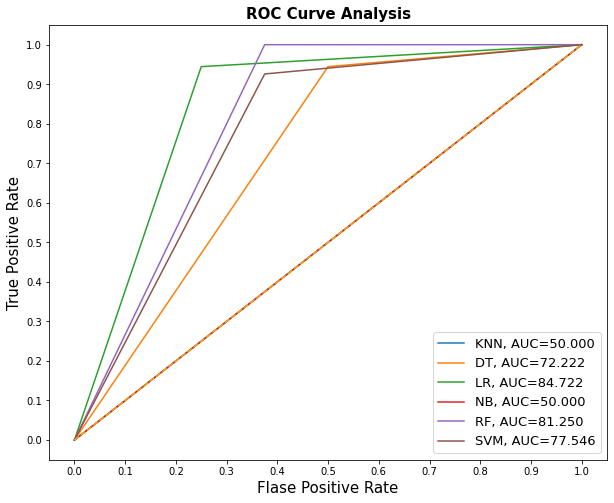

In [20]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Print result foreach classe of models

In [21]:
for i in result_table.index:
    print("Result foreach classe for", i)
    print(classification_report(y_test, result_table.loc[i]['y_pred'], target_names=['NO','YES']))

Result foreach classe for KNN
              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         8
         YES       0.87      1.00      0.93        54

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62

Result foreach classe for DT
              precision    recall  f1-score   support

          NO       0.57      0.50      0.53         8
         YES       0.93      0.94      0.94        54

    accuracy                           0.89        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.88      0.89      0.88        62

Result foreach classe for LR
              precision    recall  f1-score   support

          NO       0.67      0.75      0.71         8
         YES       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat